**Objective**:
The objective of this assignment is to train a LSTM neural network to perform 3-class sentiment analysis on Twitter data.

**Steps**

*   Collect a sample of at least 100,000 tweets from the dataset.


*   Preprocess the text data by removing punctuation, lowercasing, removing stop words, and tokenizing the words.

*   Split the data into training and testing sets, and pad the sequences to the same length.

*   Build a LSTM model to classify the tweets as positive, neutral, or negative. The model should have an Embedding layer, followed LSTM layers of your choosing, and a dense layer for output.

*   Train the model on the training data and evaluate its performance on the testing data.

*   Fine-tune the model by experimenting with different architectures, optimizers, activation functions, and hyperparameters. Feel free to experiment with GRUs.

*   Report the accuracy, precision, recall, and F1 score of the model on the testing data. Inclue graphs and necessary data. Include this in a markdown cell within the notebook. Compare the basic LSTM model against SOTA and other architectures which you can directly import.


*   Use the trained model to predict the sentiment of 25 new tweets with positive (2), neutral (1), or negative (0).


# Collection of data

In [1]:
import pandas as pd
#data provided to us

df1 = pd.read_csv('1.tsv', sep='\t', header=None)
df2= pd.read_csv('2.tsv', sep='\t', header=None)
df3 = pd.read_csv('3.txt', sep='\t', header=None)
df4 = pd.read_csv('4.txt', sep='\t', header=None)
df5 = pd.read_csv('5.txt', sep='\t', header=None)
df6 = pd.read_csv('6.txt', sep='\t', header=None)
df7 = pd.read_csv('7.txt', sep='\t', header=None)
df8 = pd.read_csv('8.txt', sep='\t', header=None)
df9 = pd.read_csv('9.txt', sep='\t', header=None)
df10 = pd.read_csv('10.txt', sep='\t', header=None)
df11 = pd.read_csv('11.txt', sep='\t', header=None)
df12 = pd.read_csv('12.txt', sep='\t', header=None)
df13 = pd.read_csv('13.txt', sep='\t', header=None)

#validation data from the link for 
df_val = pd.read_csv('testdata.manual.2009.06.14.csv',sep=',',encoding= 'latin-1',header=None)

In [2]:
dfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13]#list of training data
for i in dfs:
    print(i.shape)

(1142, 4)
(2094, 4)
(1654, 3)
(3547, 3)
(9684, 3)
(49, 3)
(1853, 3)
(2390, 3)
(489, 3)
(1966, 3)
(2000, 3)
(20632, 4)
(5868, 3)


Since the shape is different so we cannot append it as it is and need to resize the columns to append it.

In [3]:
s=0
for i in dfs:
    s += i.shape[0]
print('Length after appending all the dataframes shouls be',s,len(dfs))

Length after appending all the dataframes shouls be 53368 13


In [4]:
df1.head(2)

,0,1,2,3
0,463584.0,LJ111111,negative,"I know I missed something here , but what does..."
1,463584.0,LJ111113,neutral,What do you think of Beside Ourselves as a tit...


In [5]:
df3.head(2)

,0,1,2
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,263791921753882624,neutral,Some areas of New England could see the first ...


In [6]:
df12.head(2)

,0,1,2,3
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,NaN


In [7]:
# drop last column from df12
df12.drop([3], axis=1,inplace=True) 

#drop first and second columns from df1 and df2 and rename the text columns
df1.drop([0,1],axis=1,inplace=True)
df1.rename(columns = {2:'class',3:'tweet'}, inplace = True)
df2.drop([0,1],axis=1,inplace=True)
df2.rename(columns = {2:'class',3:'tweet'}, inplace = True)

#drop the first column from the rest of the dataframes
for i in dfs[2:]:
    i.drop([0], axis=1,inplace = True)

#rename the text column and the label column as well
for i in dfs[2:]:
    i.rename(columns = {1:'class',2:'tweet'}, inplace = True)

dfs

[         class                                              tweet
 0     negative  I know I missed something here , but what does...
 1      neutral  What do you think of Beside Ourselves as a tit...
 2     positive                    :D I intend to be one someday .
 3     negative  LLLINKKK LLLINKKK IIIMAGEEELLLINKKK The choice...
 4      neutral                     LLLINKKK Some more mountains .
 ...        ...                                                ...
 1137  positive                     Maybe it was - his - fantasy ?
 1138  negative  It was ok , but they always just seem so nervo...
 1139  positive  It is streamable from YepRoc -- matter of fact...
 1140  positive  comment telling me who you are , or how you fo...
 1141   neutral  im on myspace ... ill try and find you and add...
 
 [1142 rows x 2 columns],
          class                                              tweet
 0      neutral  Yes i am going from school have class till 5 c...
 1      neutral  can u tape the ma

In [8]:
df_train=pd.concat(dfs, axis=0, ignore_index=False)# join all the dataframes

In [9]:
df_train.shape
#the slength matches of the sum of the dataframes we wanted.

(53368, 2)

In [10]:
train_df= df_train.copy()#create its copy
train_df.drop_duplicates(subset='tweet',inplace=True)
train_df.head(2)

,class,tweet
0,negative,"I know I missed something here , but what does..."
1,neutral,What do you think of Beside Ourselves as a tit...


In [11]:
df_val.head(2)

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...


Make the validation data like training data

In [12]:
df_val.drop([1,2,3,4],axis=1,inplace=True)
df_val.rename(columns = {0:'class',5:'tweet'}, inplace = True)

In [13]:
df_val.head(2)

,class,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...


In [14]:
df_train['class'].value_counts()

neutral     24143
positive    20718
negative     8507
Name: class, dtype: int64

In [15]:
df_val['class'].value_counts()# 0- Negative , 2- Neutral , 4- positive

4    182
0    177
2    139
Name: class, dtype: int64

In [16]:
#Do Label encoding for the class column in both train and validation data
df_val['class']=df_val['class'].map({0:0,2:1,4:2})
train_df['class']=train_df['class'].map({'negative':0,'neutral':1,'positive':2})# change in copied data

# Preprocess the text data by removing punctuation, lowercasing, removing stop words, and tokenizing the words

In [17]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import spacy
import re
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pasri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pasri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
train_df["tweet"] = train_df['tweet'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))

In [19]:
#data processing
import string
import re,emoji
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [20]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(x))))))

C:\Users\pasri\AppData\Local\Temp\ipykernel_18420\1276123956.py:8: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


In [21]:
df_val["tweet"] = df_val['tweet'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))
df_val['tweet'] = df_val['tweet'].apply(lambda x: remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(x))))))

C:\Users\pasri\AppData\Local\Temp\ipykernel_18420\1276123956.py:8: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


In [24]:
train=pd.concat([train_df,df_val], axis=0, ignore_index=False)#joining val and train data to tokenize

In [25]:
train_df.head()

,class,tweet
0,0,know miss thud mean
1,1,think title
2,2,d intend someday
3,0,lllinkkk lllinkkk iiimageeelllinkkk choice roc...
4,1,lllinkkk mountain


In [26]:
max(train_df.tweet.map(str).apply(len))

4269

**Tokenization**

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
#Text Vectorization means Tokenizing Words into integers
vocab_size = 4500 #Since the max size of the tweet string is 
text2vec = TextVectorization(max_tokens=vocab_size,standardize=None,output_sequence_length=30) #Padding to same length

#Fitting on Training Data
text2vec.adapt(train['tweet'])

# Implimenting LSTM Model


Implimenting LSTM model having an Embedding layer, followed by 3 LSTM layers and a dense layer for output.

In [28]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report

model = Sequential([
    Input(shape=(1,), dtype=tf.string),text2vec,
    Embedding(vocab_size, 64, input_length=30, mask_zero=True, name='Embedding'),
    LSTM(64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', dropout=0.2, recurrent_dropout=0.2, name='LSTM1'),
    LSTM(64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', dropout=0.2, recurrent_dropout=0.2, name='LSTM2'),
    LSTM(64, return_sequences=False, activation='tanh', recurrent_activation='sigmoid', dropout=0.2, recurrent_dropout=0.2, name='LSTM3'), #Only return the final output
    Dense(3, activation='softmax', name='Dense')
])

In [29]:
#complile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
#fit the LSTM model to the training data and validating over validation data
history = model.fit(train_df['tweet'], train_df['class'], epochs=10, batch_size=32 ,validation_data=(df_val['tweet'], df_val['class']))

Epoch 1/10
1644/1644 [==============================] - 102s 60ms/step - loss: 0.8271 - accuracy: 0.6203 - val_loss: 0.8383 - val_accuracy: 0.6627
Epoch 2/10
1644/1644 [==============================] - 96s 59ms/step - loss: 0.7336 - accuracy: 0.6773 - val_loss: 0.8052 - val_accuracy: 0.6687
Epoch 3/10
1644/1644 [==============================] - 149s 90ms/step - loss: 0.7008 - accuracy: 0.6899 - val_loss: 0.8005 - val_accuracy: 0.6847
Epoch 4/10
1644/1644 [==============================] - 105s 64ms/step - loss: 0.6690 - accuracy: 0.7071 - val_loss: 0.8133 - val_accuracy: 0.6787
Epoch 5/10
1644/1644 [==============================] - 101s 61ms/step - loss: 0.6371 - accuracy: 0.7199 - val_loss: 0.8322 - val_accuracy: 0.6667
Epoch 6/10
1644/1644 [==============================] - 100s 61ms/step - loss: 0.6091 - accuracy: 0.7324 - val_loss: 0.8967 - val_accuracy: 0.6586
Epoch 7/10
1644/1644 [==============================] - 302s 184ms/step - loss: 0.5785 - accuracy: 0.7459 - val_loss: 0

<AxesSubplot:>

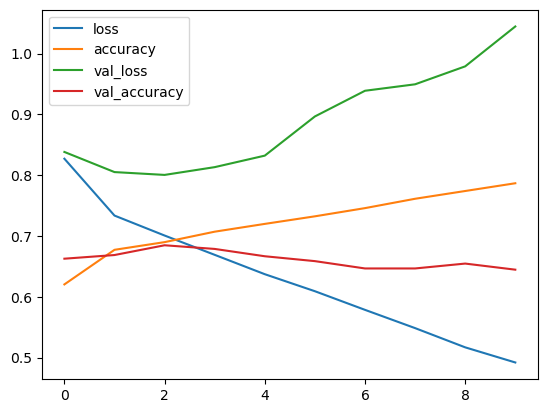

In [31]:
pd.DataFrame(history.history).plot()#plotting the training pattern

On the training data the accuracy is increasing and loss is decreasing at every point but for validation data the accuracy is is not changing much but the loss is increasing.

This shows that the model is slightly overfitted.

We will now calculate accuracy, precision, recall, and F1 score of the model

In [32]:
 # Evaluate the model on the training data
from sklearn.metrics import classification_report
y_pred = model.predict(train_df['tweet'])
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(train_df['class'], y_pred))

1644/1644 [==============================] - 20s 12ms/step
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      8397
           1       0.82      0.86      0.84     23750
           2       0.85      0.85      0.85     20443

    accuracy                           0.84     52590
   macro avg       0.85      0.82      0.83     52590
weighted avg       0.84      0.84      0.84     52590



These numbers seems nice for training data

In [33]:
 # Evaluate the model on the validation data
from sklearn.metrics import classification_report
y_pred = model.predict(df_val['tweet'])
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(df_val['class'], y_pred))

16/16 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.78      0.54      0.64       177
           1       0.52      0.71      0.60       139
           2       0.69      0.70      0.70       182

    accuracy                           0.64       498
   macro avg       0.66      0.65      0.64       498
weighted avg       0.67      0.64      0.65       498



On validation data these numbers are slightly less.

Which shows that the model is overfitting in training data

We will now predict the class on test data which is obtained by scrapping the trending tweets online

In [34]:
df_test = pd.read_csv("Tweets Scrapped.csv",header=None)
df_test.head()

,0,1
0,1,Be kind to every kind not just mankind. #Turke...
1,2,Turkish Volunteers rescued a two-month-old gir...
2,3,"Miracle!❤️👏🏼After 37 hours, a 5-year-old girl ..."
3,4,This Syrian boy records himself from\nunder th...
4,5,#TurkeySyriaEarthquake This broke my heart. Sh...


In [35]:
df_test.drop([0], axis=1,inplace=True)
df_test.rename(columns = {1:'tweet'}, inplace = True)
test_df = df_test.copy() 

In [36]:
df_test["tweet"] = df_test['tweet'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))#preprocess the test data
df_test['tweet'] = df_test['tweet'].apply(lambda x: remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(x))))))

C:\Users\pasri\AppData\Local\Temp\ipykernel_18420\1276123956.py:8: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


In [37]:
y_pred = model.predict(df_test['tweet'])
y_pred = np.argmax(y_pred, axis=1)
df_test['class_pred'] = y_pred
df_test['class_LSTM']=df_test['class_pred'].map({0:'negative',1:'neutral',2:'positive'})
df_test.drop(['class_pred'],axis=1,inplace=True)
#reults will be shown at the end

1/1 [==============================] - 0s 18ms/step


# For SOTA model we are using Convolution 1D with GRU(2018)


The article for reference-  https://journalofcloudcomputing.springeropen.com/articles/10.1186/s13677-022-00386-3



In [38]:
from tensorflow.keras.layers import Conv1D, GRU, MaxPooling1D

In [39]:
modelcon_gru = Sequential([Input(shape=(1,), dtype=tf.string),text2vec,
    Embedding(vocab_size, 64, input_length=30, mask_zero=True, name='Embedding'),
    Conv1D(32, 5, activation='tanh', padding='same'),
    MaxPooling1D(2),
    GRU(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=False),
    Dense(3, activation='softmax')
])

In [40]:
modelcon_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 Embedding (Embedding)       (None, 30, 64)            288000    
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 3)                

In [41]:
modelcon_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history2 = modelcon_gru.fit(train_df['tweet'], train_df['class'], epochs=10, batch_size=32 ,validation_data=(df_val['tweet'], df_val['class']))

Epoch 1/10
1644/1644 [==============================] - 19s 11ms/step - loss: 0.8807 - accuracy: 0.5708 - val_loss: 0.8536 - val_accuracy: 0.6486
Epoch 2/10
1644/1644 [==============================] - 18s 11ms/step - loss: 0.7220 - accuracy: 0.6836 - val_loss: 0.7889 - val_accuracy: 0.6827
Epoch 3/10
1644/1644 [==============================] - 316s 193ms/step - loss: 0.6643 - accuracy: 0.7127 - val_loss: 0.8063 - val_accuracy: 0.7008
Epoch 4/10
1644/1644 [==============================] - 16s 9ms/step - loss: 0.6026 - accuracy: 0.7435 - val_loss: 0.8773 - val_accuracy: 0.6908
Epoch 5/10
1644/1644 [==============================] - 16s 10ms/step - loss: 0.5315 - accuracy: 0.7793 - val_loss: 0.8963 - val_accuracy: 0.6787
Epoch 6/10
1644/1644 [==============================] - 18s 11ms/step - loss: 0.4609 - accuracy: 0.8126 - val_loss: 1.0564 - val_accuracy: 0.6466
Epoch 7/10
1644/1644 [==============================] - 21s 13ms/step - loss: 0.3950 - accuracy: 0.8414 - val_loss: 1.1157 

<AxesSubplot:>

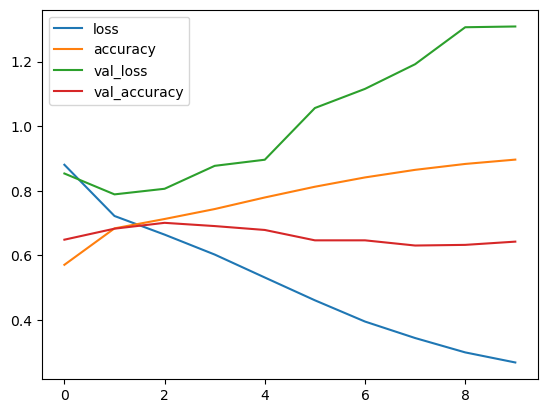

In [43]:
pd.DataFrame(history2.history).plot()

On the training data the accuracy is increasing and loss is decreasing at every point but for validation data the accuracy is is not changing much but the loss is increasing.

This shows that the model is slightly overfitted.

We will now calculate accuracy, precision, recall, and F1 score of the model

In [44]:
 # Evaluate the model on the testing data
from sklearn.metrics import classification_report
y_pred = modelcon_gru.predict(train_df['tweet'])
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(train_df['class'], y_pred))

1644/1644 [==============================] - 8s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8397
           1       0.93      0.95      0.94     23750
           2       0.96      0.94      0.95     20443

    accuracy                           0.94     52590
   macro avg       0.94      0.94      0.94     52590
weighted avg       0.95      0.94      0.94     52590



These numbers seems nice for training data

In [45]:
 # Evaluate the model on the testing data
from sklearn.metrics import classification_report
y_pred = modelcon_gru.predict(df_val['tweet'])
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(df_val['class'], y_pred))

16/16 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       177
           1       0.50      0.63      0.55       139
           2       0.68      0.69      0.68       182

    accuracy                           0.64       498
   macro avg       0.65      0.64      0.64       498
weighted avg       0.66      0.64      0.65       498



On validation data these numbers are slightly less.

Which shows that the model is overfitting in training data

In [46]:
y_pred = modelcon_gru.predict(df_test['tweet'])
y_pred = np.argmax(y_pred, axis=1)
df_test['class_pred'] = y_pred
df_test['class_GRUconv']=df_test['class_pred'].map({0:'negative',1:'neutral',2:'positive'})
df_test.drop(['class_pred'],axis=1,inplace=True)

1/1 [==============================] - 0s 16ms/step


# Results


**Convolution with GRU(Gated recurrent unit)** model trains works faster than LSTM because Convolution is parallely based while LSTM is sequential.

Th results for sentiment analysis for the twitter data which is recently scrapped using both the model is given below 

In [47]:
df_test['tweet'] = test_df['tweet']
df_test

,tweet,class_LSTM,class_GRUconv
0,Be kind to every kind not just mankind. #Turke...,neutral,positive
1,Turkish Volunteers rescued a two-month-old gir...,neutral,negative
2,"Miracle!❤️👏🏼After 37 hours, a 5-year-old girl ...",neutral,positive
3,This Syrian boy records himself from\nunder th...,neutral,neutral
4,#TurkeySyriaEarthquake This broke my heart. Sh...,negative,neutral
5,She continued to protect her brother's head un...,positive,positive
6,"""i love you hiyyih, don't let anyone bring you...",positive,positive
7,“I just want to let you know I love you bro.”\...,positive,neutral
8,I condemn this awful targeting of Ms Mahua Moi...,negative,negative
9,I miss my Ami 💜\nI love you 💜,positive,positive
